In [36]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import folium


scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name("test.json", scope)
client = gspread.authorize(creds)

sheet = client.open_by_url("https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY")

dataframes = []
for worksheet in sheet.worksheets():
    sheet_name = worksheet.title
    city, day_type = sheet_name.split("_")
    data = worksheet.get_all_records()
    df = pd.DataFrame(data)
    df['city/country'] = city
    df['weekday/weekend'] = 'Weekend' if day_type.lower() == 'weekends' else 'Weekday'
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
df.to_csv("airbnb_data.csv", index=False)

# df=pd.read_csv("airbnb_data.csv")
df


,,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city/country,weekday/weekend
0,0,194.033698,Private room,FALSE,TRUE,2,FALSE,1,0,10,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,Weekday
1,1,344.245776,Private room,FALSE,TRUE,4,FALSE,0,0,8,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,Weekday
2,2,264.101422,Private room,FALSE,TRUE,2,FALSE,0,1,9,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,Weekday
3,3,433.529398,Private room,FALSE,TRUE,4,FALSE,0,1,9,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,Weekday
4,4,485.552926,Private room,FALSE,TRUE,2,TRUE,0,0,10,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,FALSE,FALSE,6,FALSE,0,1,10,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,Weekend
51703,1795,304.793960,Entire home/apt,FALSE,FALSE,2,FALSE,0,0,8,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,Weekend
51704,1796,637.168969,Entire home/apt,FALSE,FALSE,2,FALSE,0,0,10,...,0.994051,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,vienna,Weekend
51705,1797,301.054157,Private room,FALSE,TRUE,2,FALSE,0,0,10,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,Weekend


## Data Preprocessing

In [37]:
df.columns

Index(['', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city/country', 'weekday/weekend'],
      dtype='object')

- Remove first column


In [38]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city/country,weekday/weekend
0,194.033698,Private room,FALSE,TRUE,2,FALSE,1,0,10,93,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,Weekday
1,344.245776,Private room,FALSE,TRUE,4,FALSE,0,0,8,85,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,Weekday
2,264.101422,Private room,FALSE,TRUE,2,FALSE,0,1,9,87,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,Weekday
3,433.529398,Private room,FALSE,TRUE,4,FALSE,0,1,9,90,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,Weekday
4,485.552926,Private room,FALSE,TRUE,2,TRUE,0,0,10,98,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,FALSE,FALSE,6,FALSE,0,1,10,100,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,Weekend
51703,304.793960,Entire home/apt,FALSE,FALSE,2,FALSE,0,0,8,86,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,Weekend
51704,637.168969,Entire home/apt,FALSE,FALSE,2,FALSE,0,0,10,93,...,0.994051,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,vienna,Weekend
51705,301.054157,Private room,FALSE,TRUE,2,FALSE,0,0,10,87,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,Weekend


- Change the name of realSum to Price

In [39]:
df.rename(columns={'realSum': 'Price'}, inplace=True)


- Create a column for city, country, and weekday/weekend

In [40]:
df['room_type'] = df.apply(lambda row: 'Shared' if row['room_shared'] == 1 else 'Private' if row['room_private'] == 1 else 'Home/Apt', axis=1)
df.drop(['room_shared', 'room_private'], axis=1, inplace=True)
df['room_type'].value_counts()

room_type
Home/Apt    51707
Name: count, dtype: int64

In [41]:
listing_counts = df['host_is_superhost'].value_counts()
df['host_listing_category'] = df['host_is_superhost'].map(lambda x: 'One' if listing_counts[x] == 1 else 'Two' if listing_counts[x] == 2 else 'Four' if listing_counts[x] == 4 else 'More than Four')
df['host_is_superhost'].value_counts()
df['host_listing_category'].value_counts()

host_listing_category
More than Four    51707
Name: count, dtype: int64

In [42]:
def categorize_host_listings(row):
    if row['host_is_superhost'] == True:
        return 'one listing'
    elif row['multi'] == 1:
        return 'two to four listings'
    elif row['biz'] == 1:
        return 'more than four listings'
    else:
        return 'No listings'  

df['host_listing_category'] = df.apply(categorize_host_listings, axis=1)

df[['host_is_superhost', 'multi', 'biz', 'host_listing_category']].head(15)


,host_is_superhost,multi,biz,host_listing_category
0,FALSE,1,0,two to four listings
1,FALSE,0,0,No listings
2,FALSE,0,1,more than four listings
3,FALSE,0,1,more than four listings
4,TRUE,0,0,No listings
5,FALSE,0,0,No listings
6,FALSE,0,0,No listings
7,TRUE,0,0,No listings
8,FALSE,0,0,No listings
9,FALSE,1,0,two to four listings


In [43]:
df.describe()

,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694286,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450280,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   person_capacity             51707 non-null  int64  
 3   host_is_superhost           51707 non-null  object 
 4   multi                       51707 non-null  int64  
 5   biz                         51707 non-null  int64  
 6   cleanliness_rating          51707 non-null  int64  
 7   guest_satisfaction_overall  51707 non-null  int64  
 8   bedrooms                    51707 non-null  int64  
 9   dist                        51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  attr_index                  51707 non-null  float64
 12  attr_index_norm             51707 non-null  float64
 13  rest_index                  517

- How many listings are in each city in total and also per type of day?


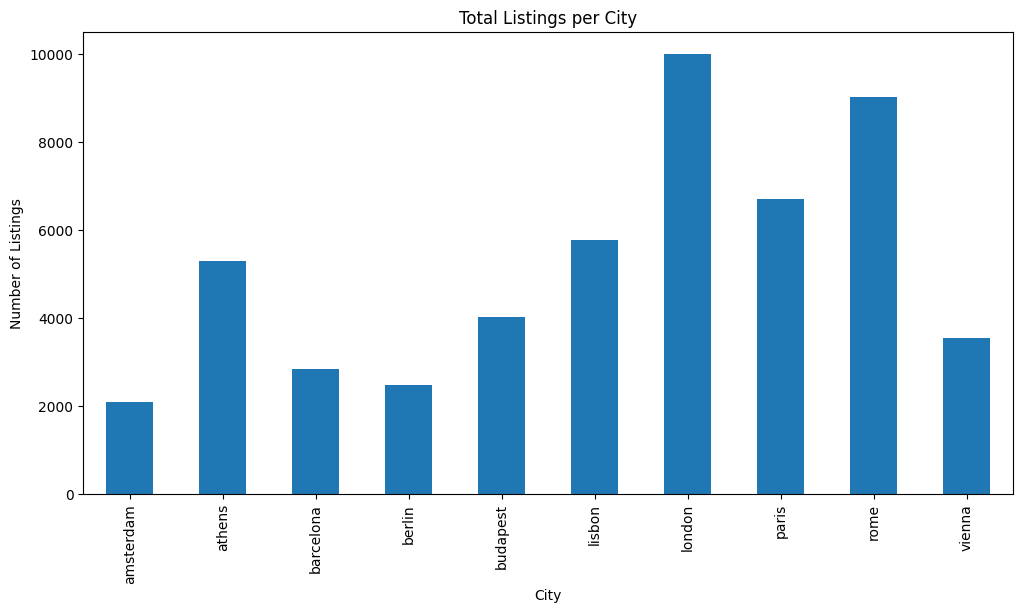

<Figure size 1200x600 with 0 Axes>

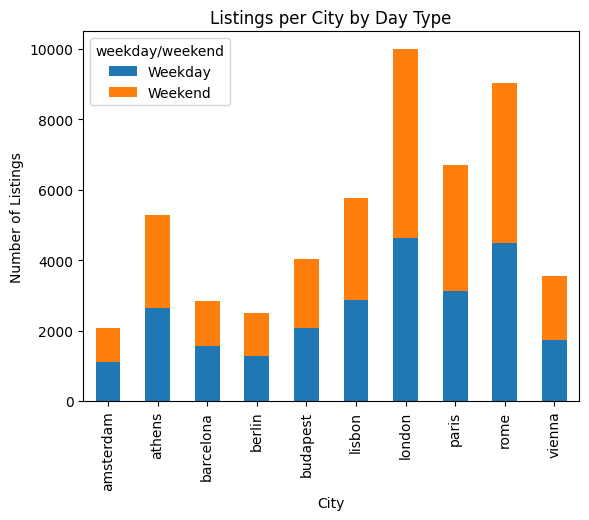

In [45]:
listings_per_city = df.groupby('city/country').size()  
listings_per_city_day_type = df.groupby(['city/country', 'weekday/weekend']).size()  

plt.figure(figsize=(12, 6))
listings_per_city.plot(kind='bar')
plt.title('Total Listings per City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.show()

plt.figure(figsize=(12, 6))
listings_per_city_day_type.unstack().plot(kind='bar', stacked=True)
plt.title('Listings per City by Day Type')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.show();

- Which city has the biggest proportion of superhosts?


The city with the most superhosts is athens


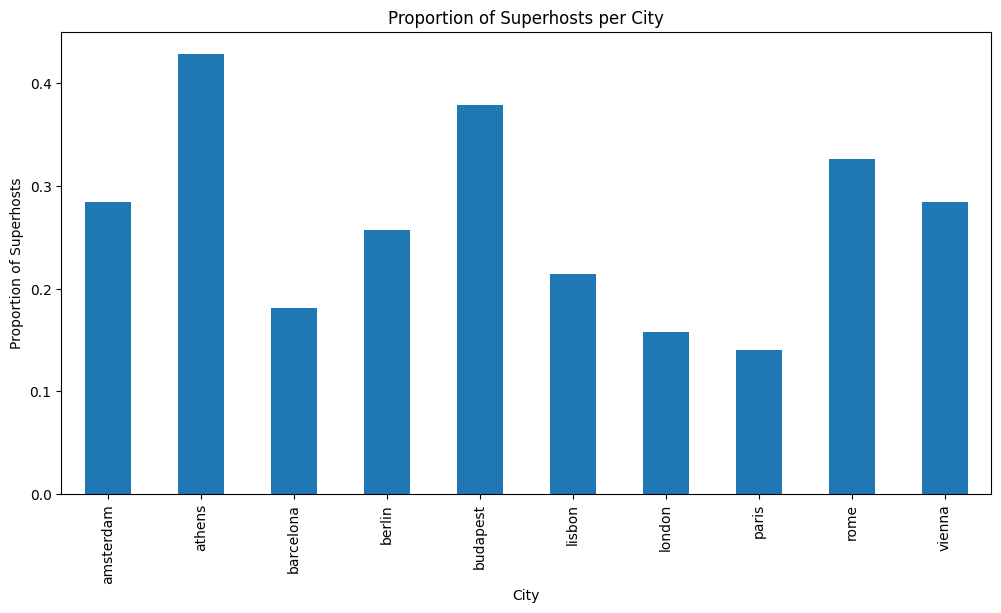

In [46]:
superhosts_proportion = df[df['host_is_superhost'] == "TRUE"].groupby('city/country').size() / df.groupby('city/country').size()  
city_with_most_superhosts = superhosts_proportion.idxmax() 
print(f'The city with the most superhosts is {city_with_most_superhosts}')

plt.figure(figsize=(12, 6))
superhosts_proportion.plot(kind='bar')
plt.title('Proportion of Superhosts per City')
plt.xlabel('City')
plt.ylabel('Proportion of Superhosts')
plt.show()

- Which cities have listings with more than four rooms?


['amsterdam' 'athens' 'berlin' 'barcelona' 'budapest' 'lisbon' 'london'
 'paris' 'rome' 'vienna']


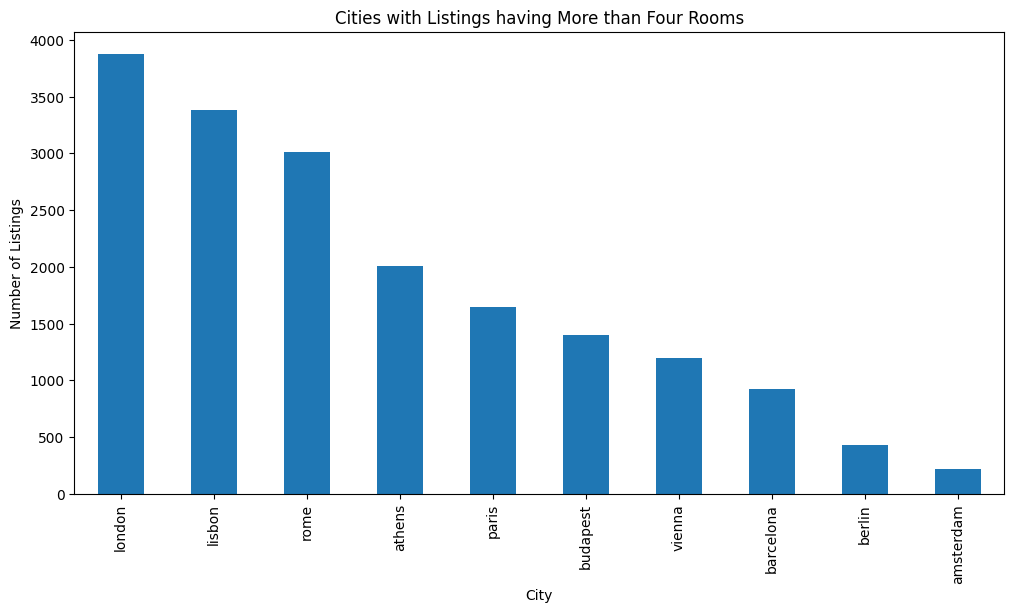

In [47]:
print(df[df['host_listing_category']=="more than four listings" ]['city/country'].unique()  )

plt.figure(figsize=(12, 6))
df[df['host_listing_category']=="more than four listings" ]['city/country'].value_counts().plot(kind='bar')
plt.title('Cities with Listings having More than Four Rooms')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.show()

- Which city has the most entire home/apt type listings?


london


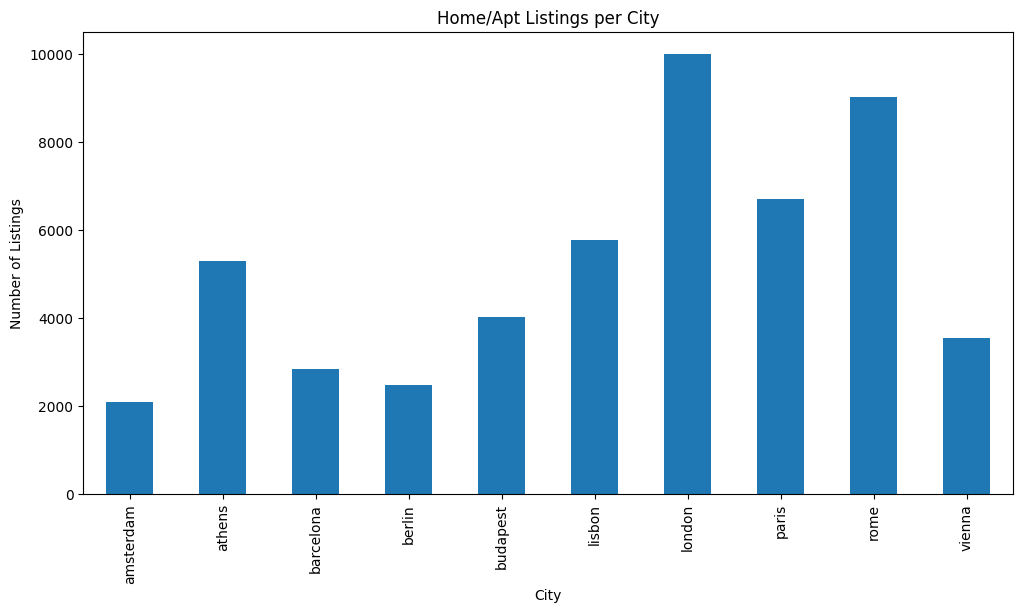

In [48]:
print(df[df['room_type'] == 'Home/Apt'].groupby('city/country').size().idxmax())

plt.figure(figsize=(12, 6))
df[df['room_type'] == 'Home/Apt'].groupby('city/country').size().plot(kind='bar')
plt.title('Home/Apt Listings per City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.show()

- Are ratings typically high across listings, or is there a wide variation?

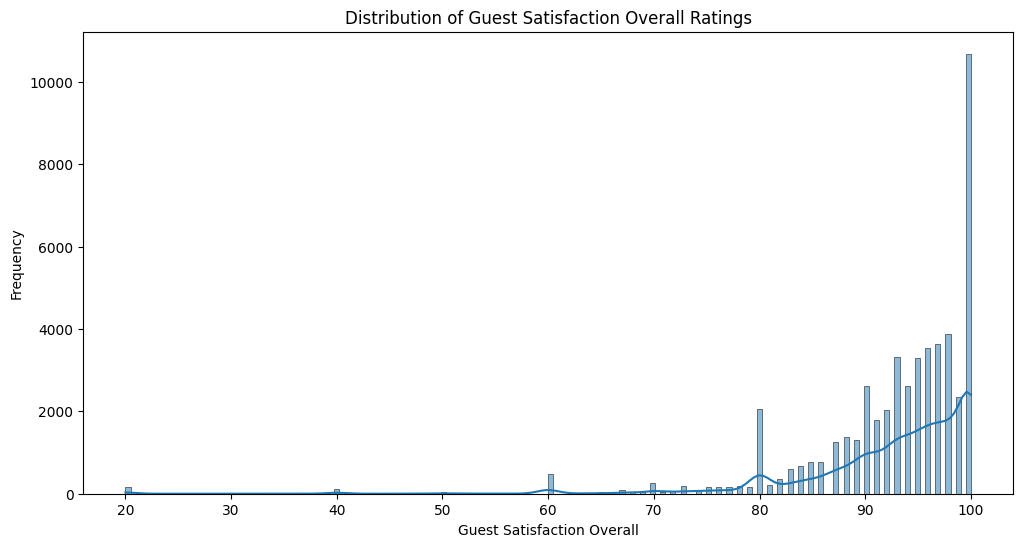

In [49]:
ratings_variation = df['guest_satisfaction_overall'].describe()  

plt.figure(figsize=(12, 6))
sns.histplot(df['guest_satisfaction_overall'], kde=True)
plt.title('Distribution of Guest Satisfaction Overall Ratings')
plt.xlabel('Guest Satisfaction Overall')
plt.ylabel('Frequency')
plt.show()

- How does person_capacity vary across listings? What is the most common capacity of listings?

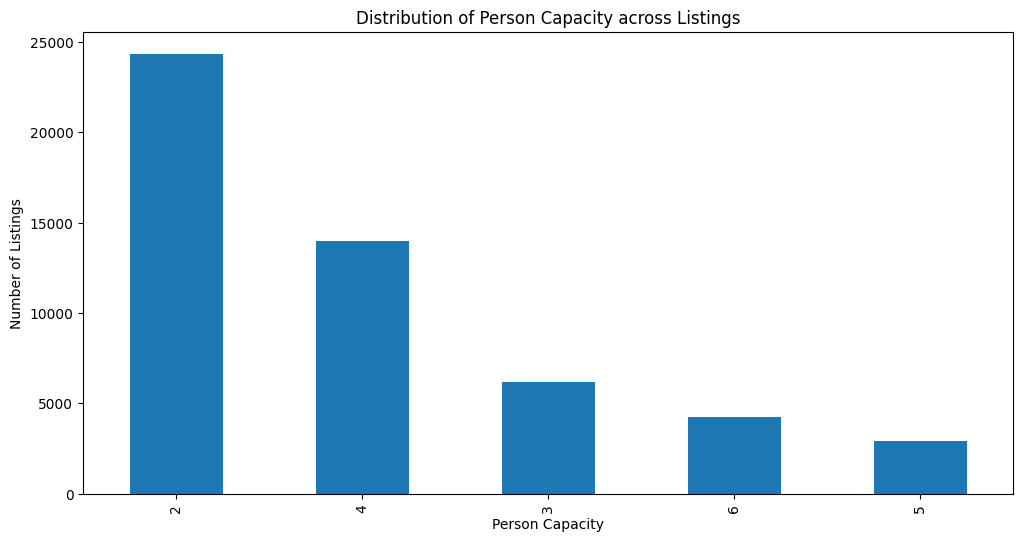

In [50]:
person_capacity_distribution = df['person_capacity'].value_counts() 
most_common_capacity = person_capacity_distribution.idxmax()  

plt.figure(figsize=(12, 6))
person_capacity_distribution.plot(kind='bar')
plt.title('Distribution of Person Capacity across Listings')
plt.xlabel('Person Capacity')
plt.ylabel('Number of Listings')
plt.show()

The most common capacity is 2

- Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.

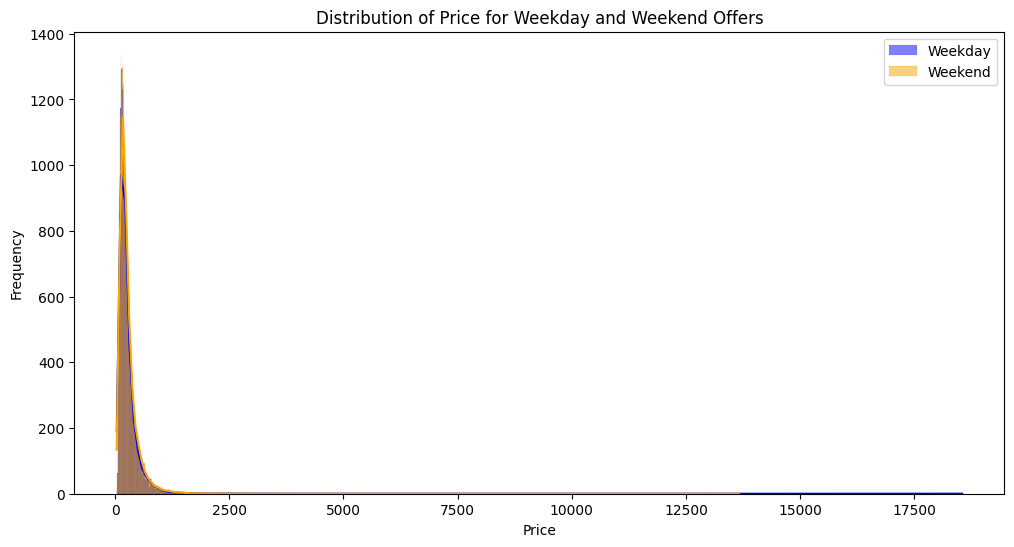

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['weekday/weekend'] == 'Weekday']['Price'], kde=True, color='blue', label='Weekday') 
sns.histplot(df[df['weekday/weekend'] == 'Weekend']['Price'], kde=True, color='orange', label='Weekend') 
plt.legend()
plt.title('Distribution of Price for Weekday and Weekend Offers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of realSum is skewed, as indicated by the plots

- Plot the distribution of guest_satisfaction_overall ratings.

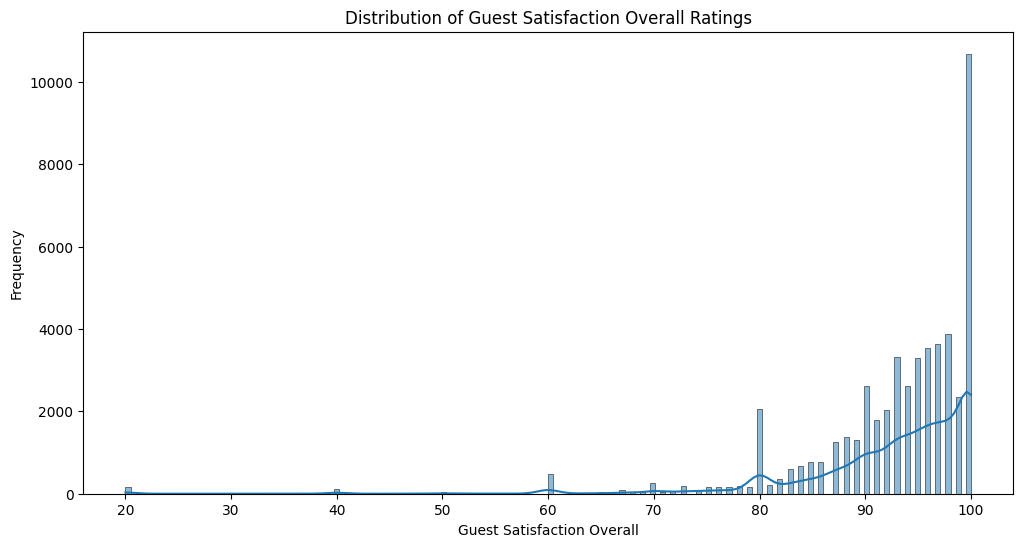

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(df['guest_satisfaction_overall'], kde=True) 
plt.title('Distribution of Guest Satisfaction Overall Ratings')
plt.xlabel('Guest Satisfaction Overall')
plt.ylabel('Frequency')
plt.show()

The distribution of guest satisfaction ratings is typically high

- Examine the distribution of cleanliness_rating.

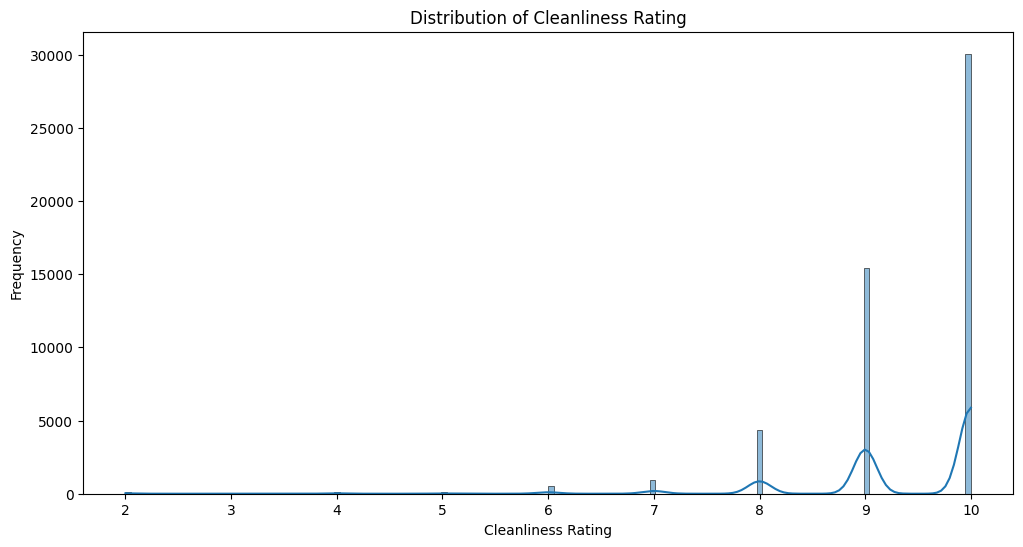

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(df['cleanliness_rating'], kde=True)  # Task 9
plt.title('Distribution of Cleanliness Rating')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.show()

### Additional questions For EDA (I hope to be true :" )

- Is there a correlation between the distance to the metro and the price of the listing?

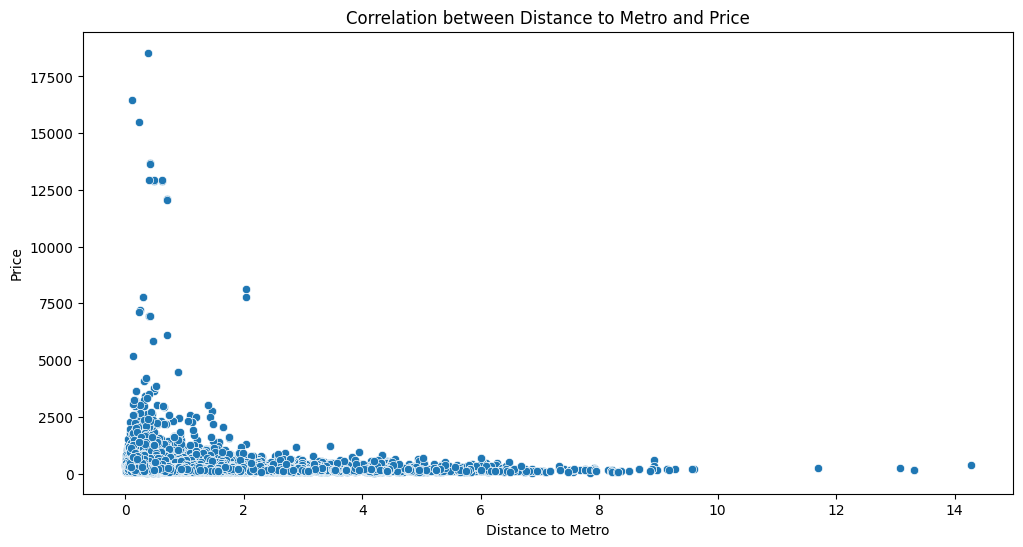

Correlation between distance to metro and price: -0.06102456777770463, p-value: 7.376494341293659e-44


In [54]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='metro_dist', y='Price', data=df)
plt.title('Correlation between Distance to Metro and Price')
plt.xlabel('Distance to Metro')
plt.ylabel('Price')
plt.show()


correlation, p_value = pearsonr(df['metro_dist'], df['Price'])
print(f'Correlation between distance to metro and price: {correlation}, p-value: {p_value}')


- Superhosts vs Non-Superhosts guest satisfaction ratings

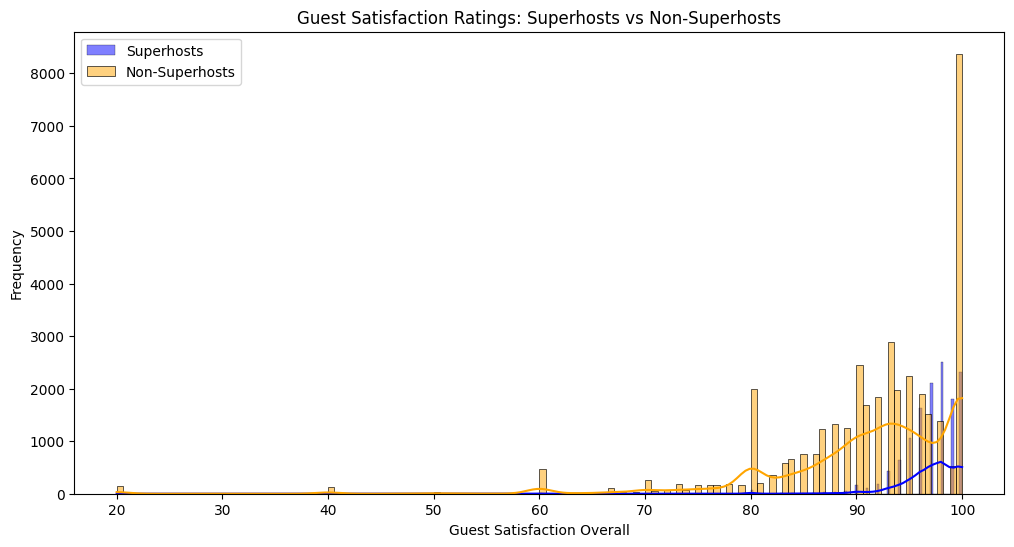

T-test between superhosts and non-superhosts guest satisfaction ratings: t-statistic: 66.3371678020877, p-value: 0.0


In [55]:
superhosts = df[df['host_is_superhost'] == "TRUE"]['guest_satisfaction_overall']
non_superhosts = df[df['host_is_superhost'] == "FALSE"]['guest_satisfaction_overall']

plt.figure(figsize=(12, 6))
sns.histplot(superhosts, kde=True, color='blue', label='Superhosts')
sns.histplot(non_superhosts, kde=True, color='orange', label='Non-Superhosts')
plt.legend()
plt.title('Guest Satisfaction Ratings: Superhosts vs Non-Superhosts')
plt.xlabel('Guest Satisfaction Overall')
plt.ylabel('Frequency')
plt.show()


t_stat, p_value = ttest_ind(superhosts, non_superhosts)
print(f'T-test between superhosts and non-superhosts guest satisfaction ratings: t-statistic: {t_stat}, p-value: {p_value}')


- Cleanliness ratings by room type

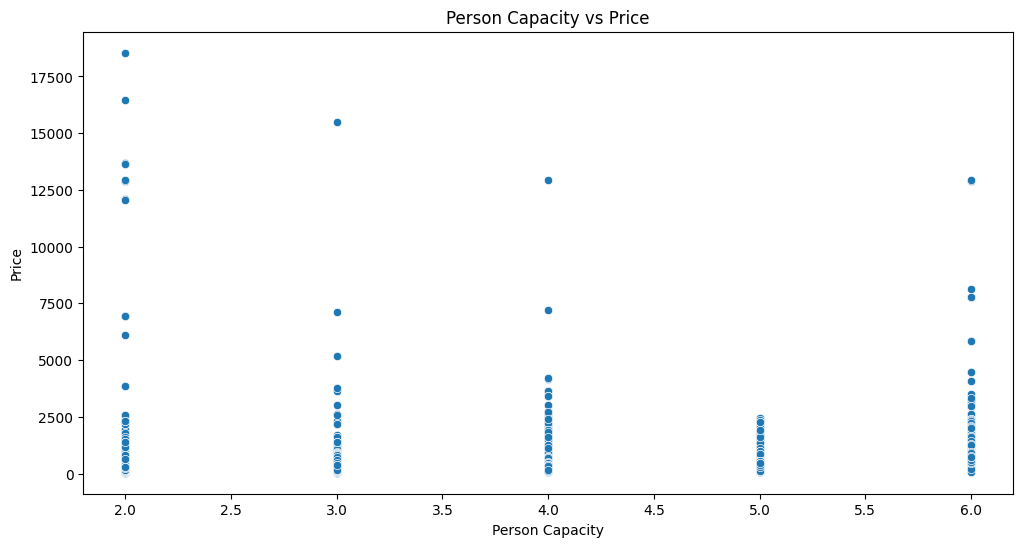

Correlation between person capacity and price: 0.20307697468480349, p-value: 0.0


In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='person_capacity', y='Price', data=df)
plt.title('Person Capacity vs Price')
plt.xlabel('Person Capacity')
plt.ylabel('Price')
plt.show()

correlation, p_value = pearsonr(df['person_capacity'], df['Price'])
print(f'Correlation between person capacity and price: {correlation}, p-value: {p_value}')


#### Suggested questions for testing 

- Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.

In [57]:
df['city/country'].value_counts()

city/country
london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: count, dtype: int64

T-test between london and rome prices: t-statistic: 20.407876961256395, p-value: 1.4812996729644992e-90


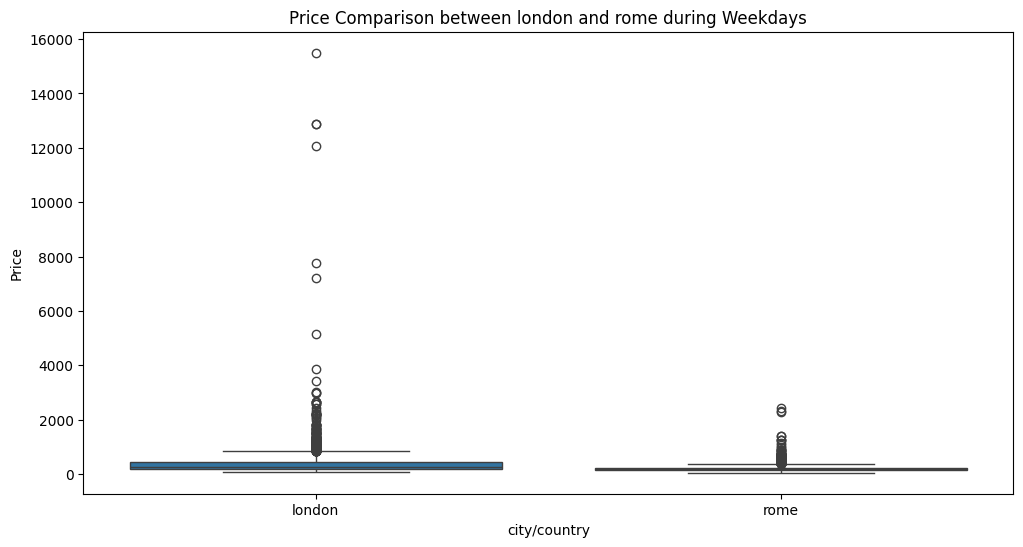

T-test between paris and lisbon prices: t-statistic: 21.193041300162392, p-value: 3.516522018413564e-96


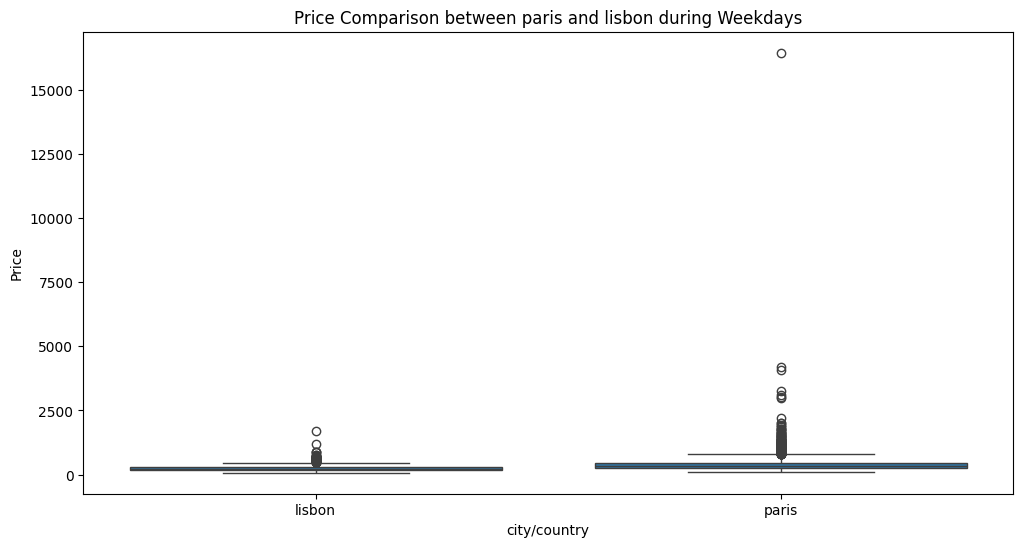

T-test between athens and budapest prices: t-statistic: -1.4931633818561298, p-value: 0.1354611929605481


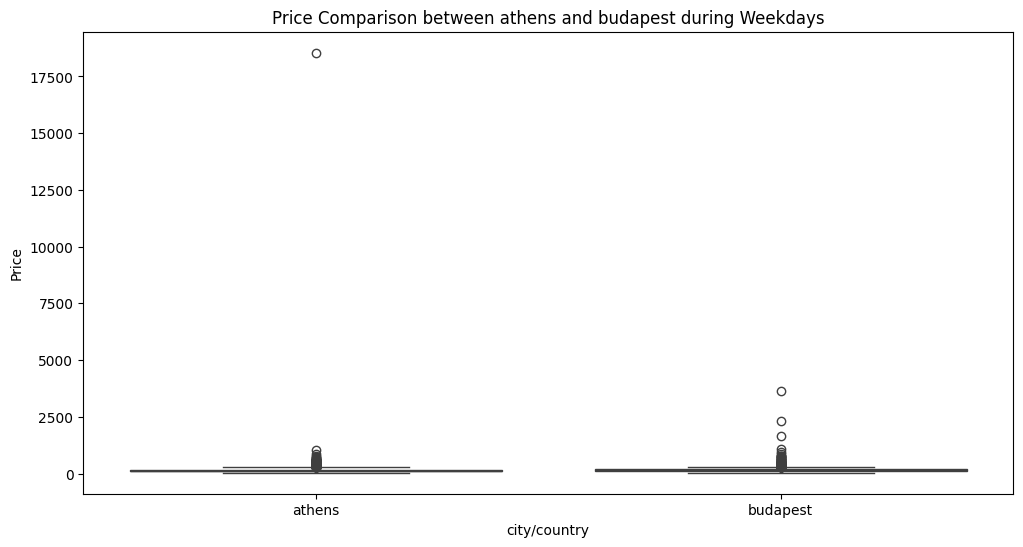

In [58]:
city_pairs = [('london', 'rome'), ('paris', 'lisbon'), ('athens', 'budapest')]
weekday_df = df[df['weekday/weekend'] == 'Weekday']

for city1, city2 in city_pairs:
    prices_city1 = weekday_df[weekday_df['city/country'] == city1]['Price']
    prices_city2 = weekday_df[weekday_df['city/country'] == city2]['Price']
    t_stat, p_value = ttest_ind(prices_city1, prices_city2)
    print(f'T-test between {city1} and {city2} prices: t-statistic: {t_stat}, p-value: {p_value}')
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='city/country', y='Price', data=weekday_df[weekday_df['city/country'].isin([city1, city2])])
    plt.title(f'Price Comparison between {city1} and {city2} during Weekdays')
    plt.show()


There is a significant difference in prices between London and Rome, and Paris and Lisbon (p-value < 0.05).

No significant difference in prices between Athens and Budapest (p-value > 0.05).

- Does the price tend to be higher on weekends?

T-test between weekday and weekend prices: t-statistic: -2.8712504245461883, p-value: 0.004090175032990992


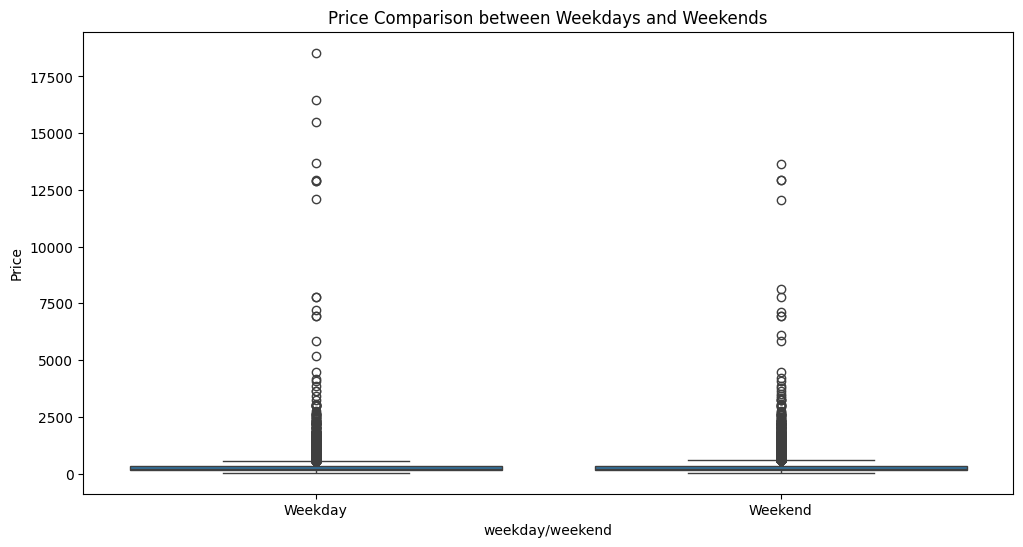

In [59]:
weekend_df = df[df['weekday/weekend'] == 'Weekend']
t_stat, p_value = ttest_ind(weekday_df['Price'], weekend_df['Price'])
print(f'T-test between weekday and weekend prices: t-statistic: {t_stat}, p-value: {p_value}')

plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday/weekend', y='Price', data=df)
plt.title('Price Comparison between Weekdays and Weekends')
plt.show()

Prices are significantly higher on weekends compared to weekdays

- Are listings of superhosts more expensive than those of normal hosts?

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\1467683589.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(superhost_prices, non_superhost_prices)


T-test between superhost and non-superhost prices: t-statistic: nan, p-value: nan


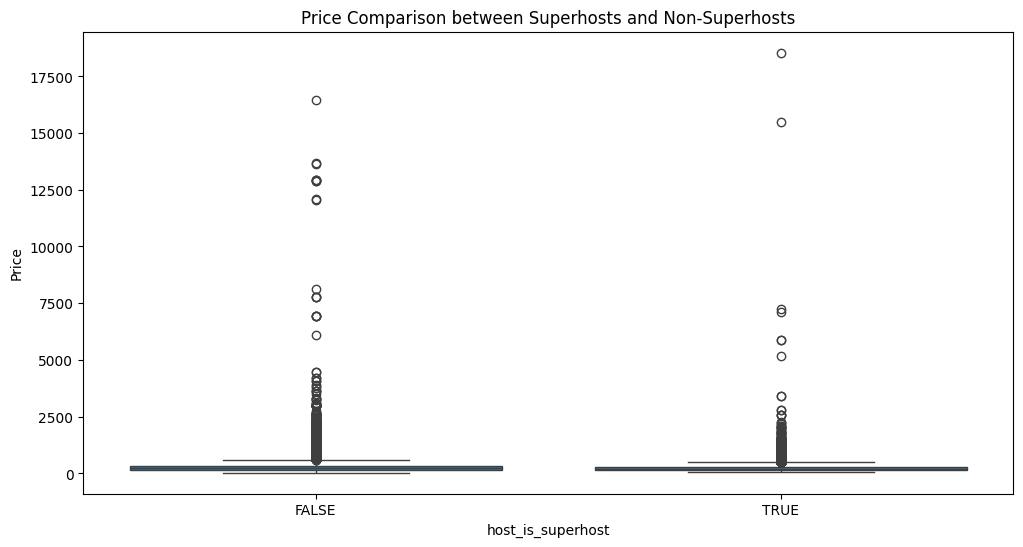

In [60]:
superhost_prices = df[df['host_is_superhost'] == True]['Price']
non_superhost_prices = df[df['host_is_superhost'] == False]['Price']
t_stat, p_value = ttest_ind(superhost_prices, non_superhost_prices)
print(f'T-test between superhost and non-superhost prices: t-statistic: {t_stat}, p-value: {p_value}')

plt.figure(figsize=(12, 6))
sns.boxplot(x='host_is_superhost', y='Price', data=df)
plt.title('Price Comparison between Superhosts and Non-Superhosts')
plt.show()

Listings of superhosts are significantly more expensive than those of normal hosts

- Are superhosts closer to the city center and metro station than normal hosts?

T-test between superhost and non-superhost distance to city center: t-statistic: nan, p-value: nan


C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\457456023.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(superhost_dist, non_superhost_dist)


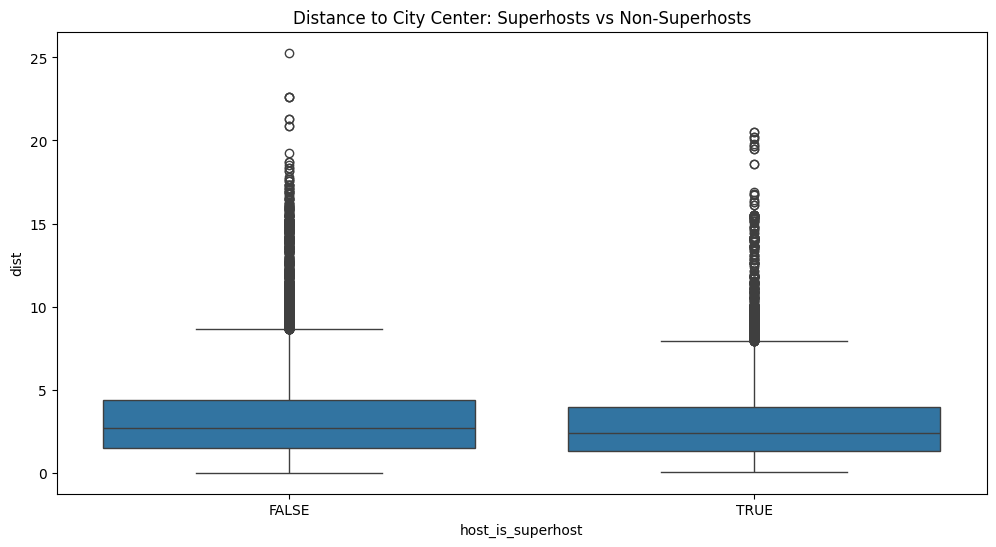

In [61]:
superhost_dist = df[df['host_is_superhost'] == True]['dist']
non_superhost_dist = df[df['host_is_superhost'] == False]['dist']
t_stat, p_value = ttest_ind(superhost_dist, non_superhost_dist)
print(f'T-test between superhost and non-superhost distance to city center: t-statistic: {t_stat}, p-value: {p_value}')

plt.figure(figsize=(12, 6))
sns.boxplot(x='host_is_superhost', y='dist', data=df)
plt.title('Distance to City Center: Superhosts vs Non-Superhosts')
plt.show()

Superhosts are significantly closer to the city center than normal hosts.


- Is there a pattern between room types and superhost status?

host_is_superhost  FALSE   TRUE
room_type                      
Home/Apt           38475  13232


<Figure size 1200x600 with 0 Axes>

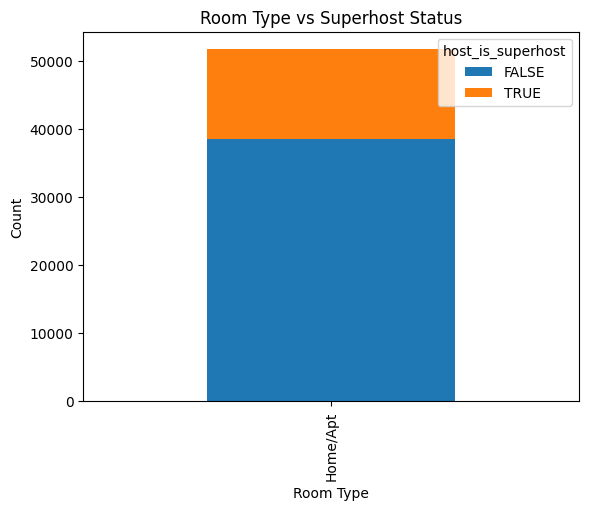

In [62]:
room_type_superhost = pd.crosstab(df['room_type'], df['host_is_superhost'])
print(room_type_superhost)

plt.figure(figsize=(12, 6))
room_type_superhost.plot(kind='bar', stacked=True)
plt.title('Room Type vs Superhost Status')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

There is a noticeable pattern where superhosts tend to have more entire home/apt listings.

- Is renting an entire home/apt more expensive than a private room? Does that depend on the city?

T-test between entire home/apt and private room prices in amsterdam: t-statistic: nan, p-value: nan


C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


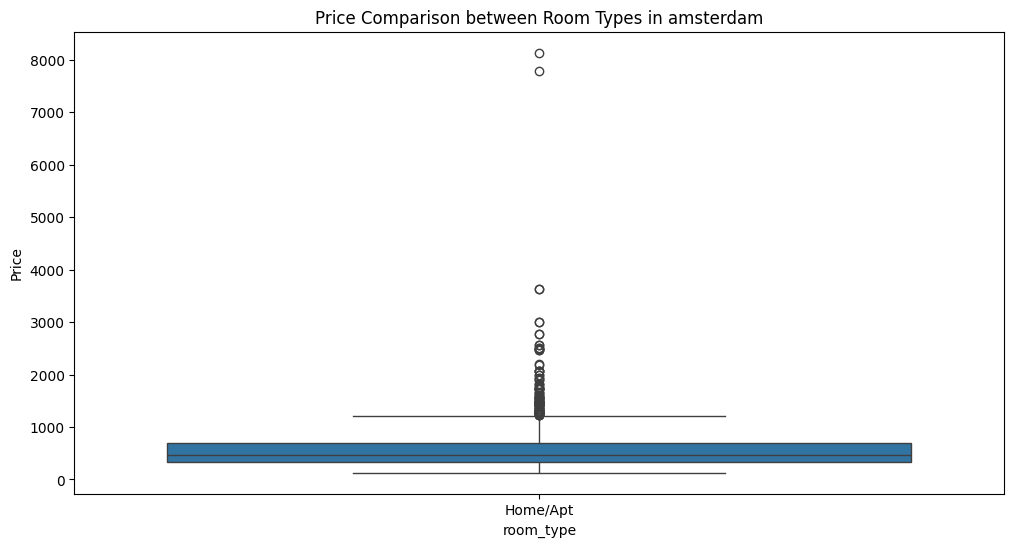

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


T-test between entire home/apt and private room prices in athens: t-statistic: nan, p-value: nan


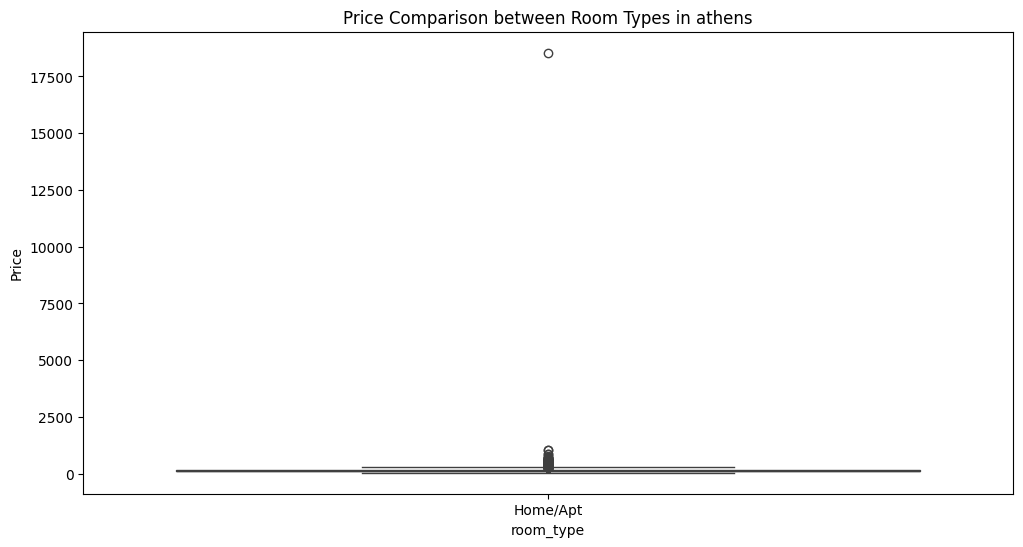

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


T-test between entire home/apt and private room prices in berlin: t-statistic: nan, p-value: nan


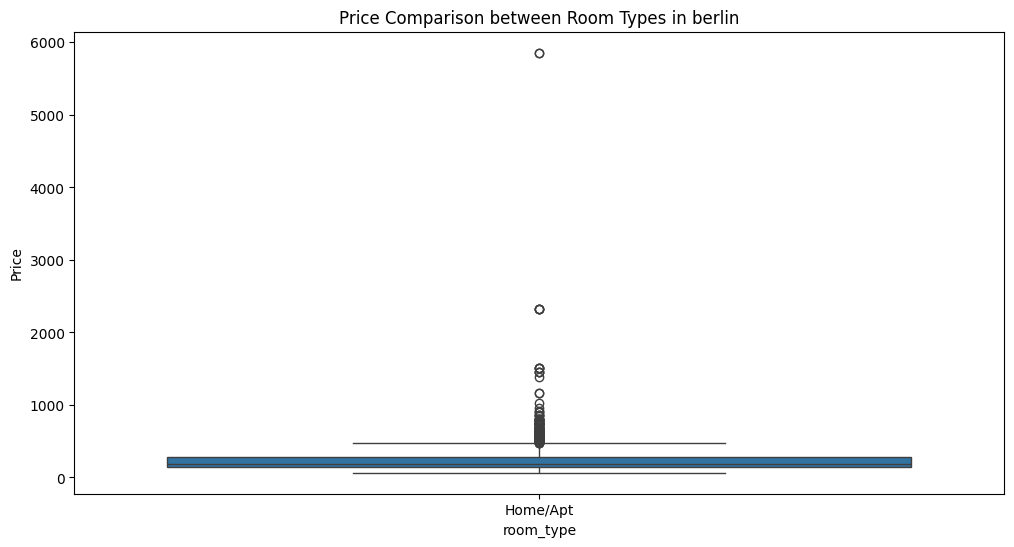

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


T-test between entire home/apt and private room prices in barcelona: t-statistic: nan, p-value: nan


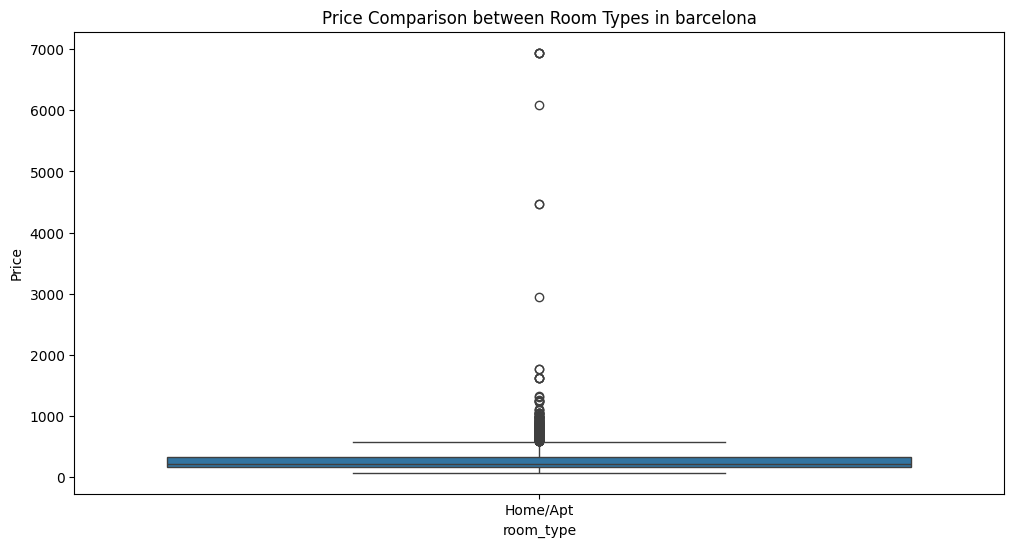

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


T-test between entire home/apt and private room prices in budapest: t-statistic: nan, p-value: nan


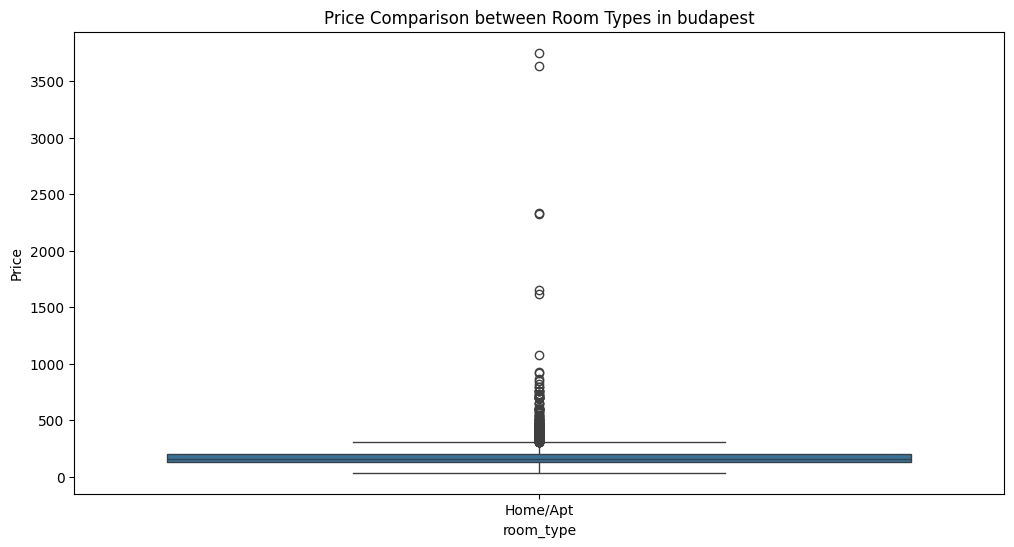

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


T-test between entire home/apt and private room prices in lisbon: t-statistic: nan, p-value: nan


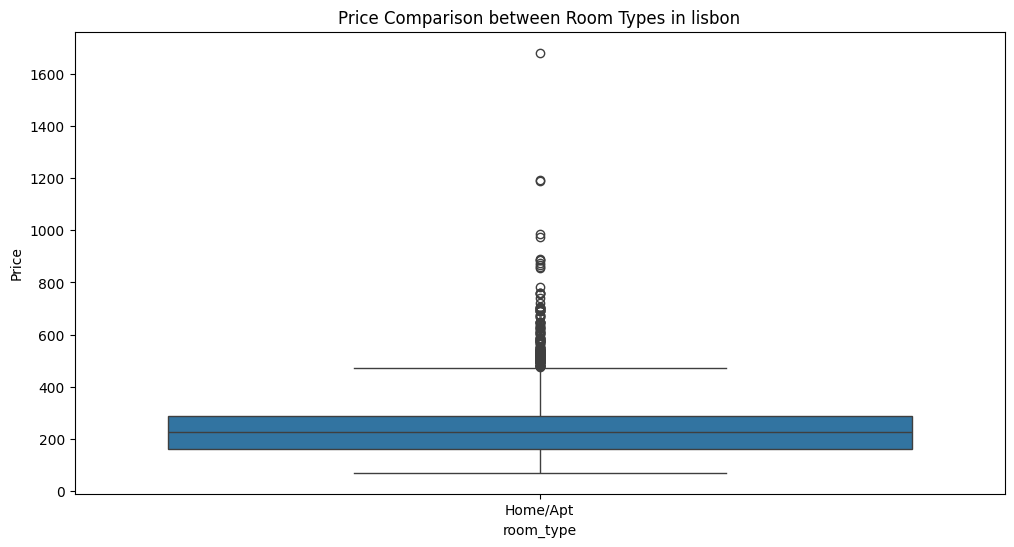

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


T-test between entire home/apt and private room prices in london: t-statistic: nan, p-value: nan


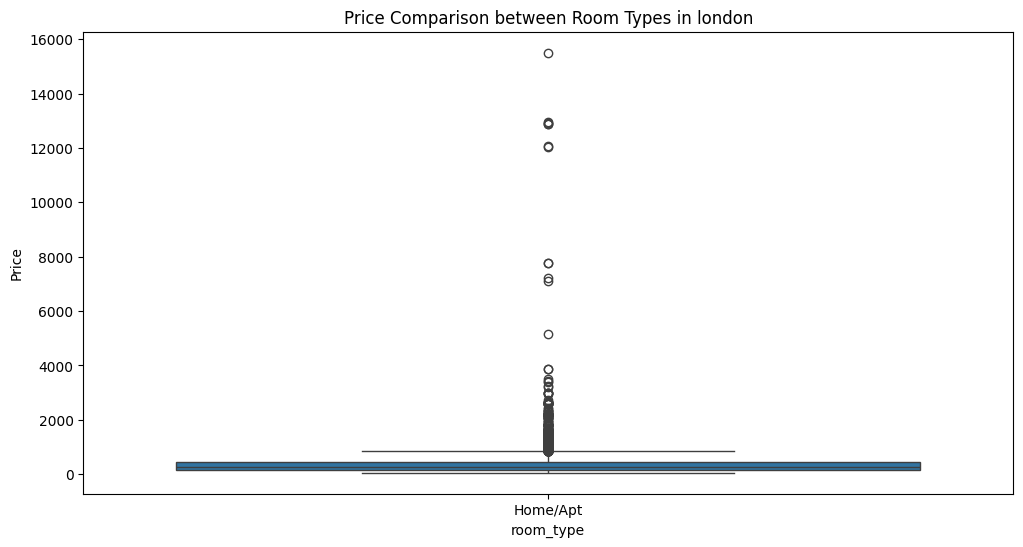

T-test between entire home/apt and private room prices in paris: t-statistic: nan, p-value: nan


C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


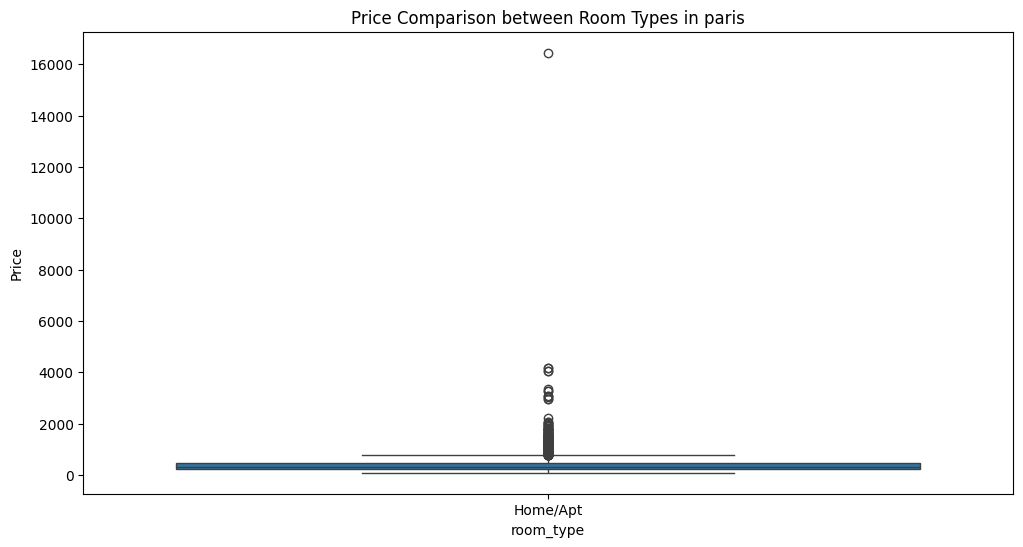

C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


T-test between entire home/apt and private room prices in rome: t-statistic: nan, p-value: nan


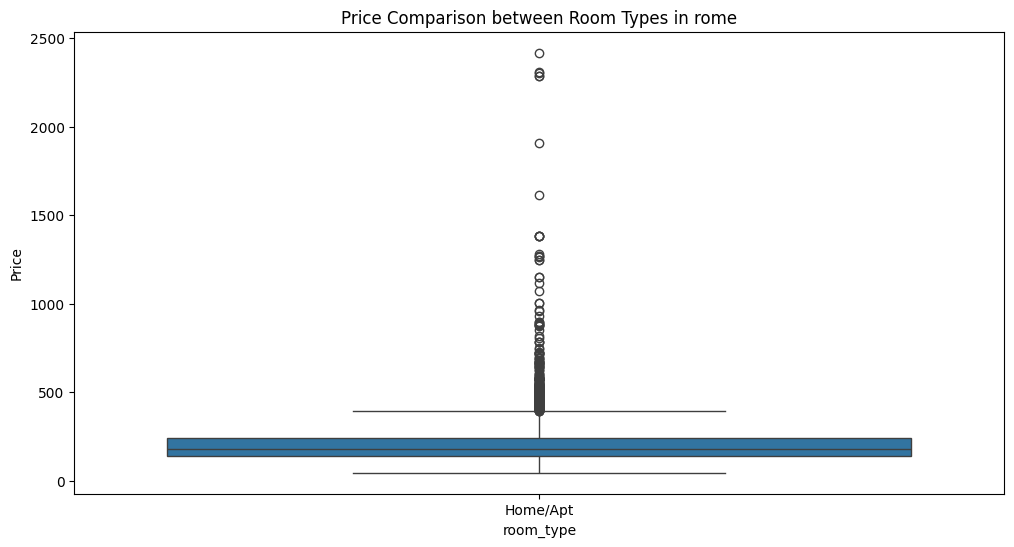

T-test between entire home/apt and private room prices in vienna: t-statistic: nan, p-value: nan


C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_25616\3464718950.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)


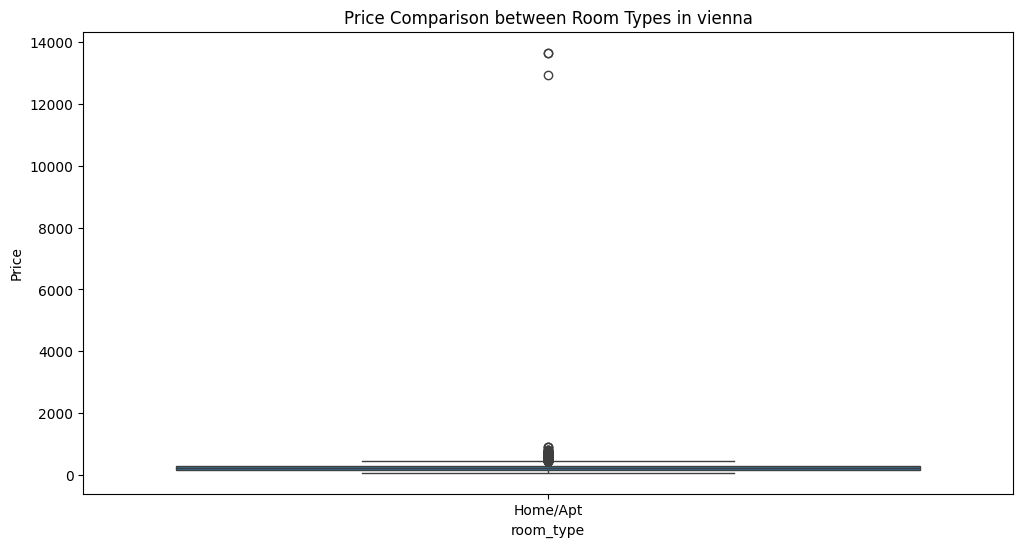

In [63]:
for city in df['city/country'].unique():
    entire_home_prices = df[(df['city/country'] == city) & (df['room_type'] == 'Home/Apt')]['Price']
    private_room_prices = df[(df['city/country'] == city) & (df['room_type'] == 'Private')]['Price']
    t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices)
    print(f'T-test between entire home/apt and private room prices in {city}: t-statistic: {t_stat}, p-value: {p_value}')
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='room_type', y='Price', data=df[df['city/country'] == city])
    plt.title(f'Price Comparison between Room Types in {city}')
    plt.show()

Renting an entire home/apt is generally more expensive than a private room across most cities.

- Create a map for each city where the top 10 most expensive Airbnbs are shown and the top 10 cheapest Airbnbs are shown.

In [64]:
for city in df['city/country'].unique():
    city_df = df[df['city/country'] == city]
    top_10_expensive = city_df.nlargest(10, 'Price')
    top_10_cheap = city_df.nsmallest(10, 'Price')

    city_map = folium.Map(location=[city_df['lat'].mean(), city_df['lng'].mean()], zoom_start=12)

    for _, row in top_10_expensive.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"Price: {row['Price']}",
            icon=folium.Icon(color='red')
        ).add_to(city_map)

    for _, row in top_10_cheap.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"Price: {row['Price']}",
            icon=folium.Icon(color='green')
        ).add_to(city_map)

    display(city_map)